## Crop Op

In [1]:
//load ImageJ
%classpath config resolver scijava.public https://maven.scijava.org/content/groups/public
%classpath add mvn net.imagej imagej 2.0.0-rc-67

//create ImageJ object
ij = new net.imagej.ImageJ()

Added new repo: scijava.public


net.imagej.ImageJ@2d543248

This `Op` wraps the `Views.crop()` method of ImgLib2, returning a subregion of any input `RandomAccessibleInterval` or `Img`:

In [2]:
ij.op().help('crop')

Available operations:
	(ImgPlus out) =
	net.imagej.ops.transform.crop.CropImgPlus(
		ImgPlus in1,
		Interval in2,
		boolean dropSingleDimensions?)
	(RandomAccessibleInterval out) =
	net.imagej.ops.transform.crop.CropRAI(
		RandomAccessibleInterval in1,
		Interval in2,
		boolean dropSingleDimensions?)

Note the parameters here:
* `ImgPlus`/`RandomAccessibleInterval` `in1`: the input
* `Interval in2`: this is the `Interval` that defines the subregion that you want. We will show how to create this below.
* `boolean dropSingleDimensions?`: this optional parameter lets the `Op` remove any dimensions of length `1` if `dropSingleDimensions` is `true`, resulting in a 2-D image instead of a fake 3-D image.

Let's get an image to show this off:

[INFO] Populating metadata
[INFO] Populating metadata


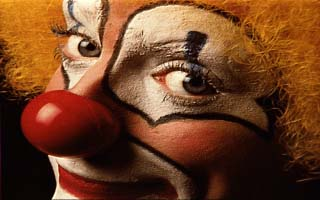

In [3]:
input = ij.scifio().datasetIO().open("http://imagej.net/images/clown.jpg")

ij.notebook().display(input)

Let's take a look at that nose of his. We have to create a `FinalInterval`, and we will use `FinalInterval.createMinSize()` to do this. The `createMinSize()` function takes `2*n` parameters, where `n` is the number of the dimensions of the image. The first `n` parameters specify the minimum of the `Interval`, and the second `n` parameters specify the size (with the minimum included). So if, for example, you are working with a colored image in 3 channels, the size in the third dimension must be three to get all 3 colors. Note that we have 3 dimensions (width, height, color), so we will have 6 parameters:

In [4]:
import net.imglib2.FinalInterval

interval = FinalInterval.createMinSize(15, 75, 0, 110, 100, 3)

net.imglib2.FinalInterval@56d41d87

Now we pass the `FinalInterval` and the `Img` into the `Op`:

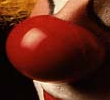

In [5]:
cropped = ij.op().transform().crop(input, interval, true)

ij.notebook().display(cropped)